# Análisis de auctions.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('max_columns', 8, 'max_rows', 10)

## Limpieza del data frame

In [5]:
# La lectura es lenta y require mucha memoria
# Es mejor leer el DataFrame en la sección siguiente directamente
auctions = pd.read_csv('data/auctions.csv.gzip', compression='gzip', low_memory=False, parse_dates=['date'])
auctions.head()

,date,device_id,ref_type_id,source_id
0,2019-04-23 18:58:00.842116,2564673204772915246,1,0
1,2019-04-23 18:58:01.530771,4441121667607578179,7,0
2,2019-04-23 18:58:01.767562,7721769811471055264,1,0
3,2019-04-23 18:58:02.363468,6416039086842158968,1,0
4,2019-04-23 18:58:02.397559,1258642015983312729,1,0


In [6]:
auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47409528 entries, 0 to 47409527
Data columns (total 4 columns):
date           object
device_id      int64
ref_type_id    int64
source_id      int64
dtypes: int64(3), object(1)
memory usage: 1.4+ GB


In [12]:
auctions['device_id'].nunique()

475338

In [7]:
auctions['ref_type_id'].value_counts()

1    40330743
7     7078785
Name: ref_type_id, dtype: int64

In [8]:
auctions['source_id'].value_counts()

1    24409571
0    11269616
3     7037160
7     1323280
6     1173914
8      839397
5      676993
4      430468
2      245462
9        3667
Name: source_id, dtype: int64

In [13]:
auctions['source_id'] = auctions['source_id'].astype(np.uint8)
auctions['ref_type_id'] = auctions['ref_type_id'].astype(np.uint8)

In [16]:
auctions.isnull().any()

date           False
device_id      False
ref_type_id    False
source_id      False
dtype: bool

In [17]:
auctions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47409528 entries, 0 to 47409527
Data columns (total 4 columns):
date           object
device_id      int64
ref_type_id    uint8
source_id      uint8
dtypes: int64(1), object(1), uint8(2)
memory usage: 813.8+ MB


In [18]:
auctions.head()

,date,device_id,ref_type_id,source_id
0,2019-04-23 18:58:00.842116,2564673204772915246,1,0
1,2019-04-23 18:58:01.530771,4441121667607578179,7,0
2,2019-04-23 18:58:01.767562,7721769811471055264,1,0
3,2019-04-23 18:58:02.363468,6416039086842158968,1,0
4,2019-04-23 18:58:02.397559,1258642015983312729,1,0


In [19]:
len(auctions)

47409528

## Lectura y limpieza en un paso del dataframe

In [2]:
types = {'device_id': np.uint64, 'ref_type_id': np.uint8, 'source_id': np.uint8}
auctions = pd.read_csv('data/auctions.csv.gzip', compression='gzip', low_memory=False, dtype=types,
                       parse_dates=['date'], index_col=['date'])
auctions.head()

,device_id,ref_type_id,source_id
date,,,
2019-04-23 18:58:00.842116,2564673204772915246,1,0
2019-04-23 18:58:01.530771,4441121667607578179,7,0
2019-04-23 18:58:01.767562,7721769811471055264,1,0
2019-04-23 18:58:02.363468,6416039086842158968,1,0
2019-04-23 18:58:02.397559,1258642015983312729,1,0


In [3]:
auctions.isnull().any()

device_id      False
ref_type_id    False
source_id      False
dtype: bool

In [4]:
auctions.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 47409528 entries, 2019-04-23 18:58:00.842116 to 2019-04-19 00:54:00.120451
Data columns (total 3 columns):
device_id      uint64
ref_type_id    uint8
source_id      uint8
dtypes: uint64(1), uint8(2)
memory usage: 813.8 MB


## Análisis exploratorio

In [5]:
# Ordenamos el índice para acelerar las operaciones
auctions.sort_index()

,device_id,ref_type_id,source_id
date,,,
2019-04-18 00:00:00.015050,1826643666390887030,7,0
2019-04-18 00:00:00.029014,7037174172278258682,1,0
2019-04-18 00:00:00.057540,3392065368947589877,1,1
2019-04-18 00:00:00.126828,1228982273563226229,1,1
2019-04-18 00:00:00.132510,4123059034628125459,1,8
...,...,...,...
2019-04-26 23:59:59.898628,652599192004627901,1,0
2019-04-26 23:59:59.948415,3963832332737333138,1,7
2019-04-26 23:59:59.953129,7696313774830088806,1,0


In [6]:
# Veamos cuántas subastas hay en promedio por día
daily_auctions = auctions.resample('D').size()
daily_auctions.mean()

5267725.333333333

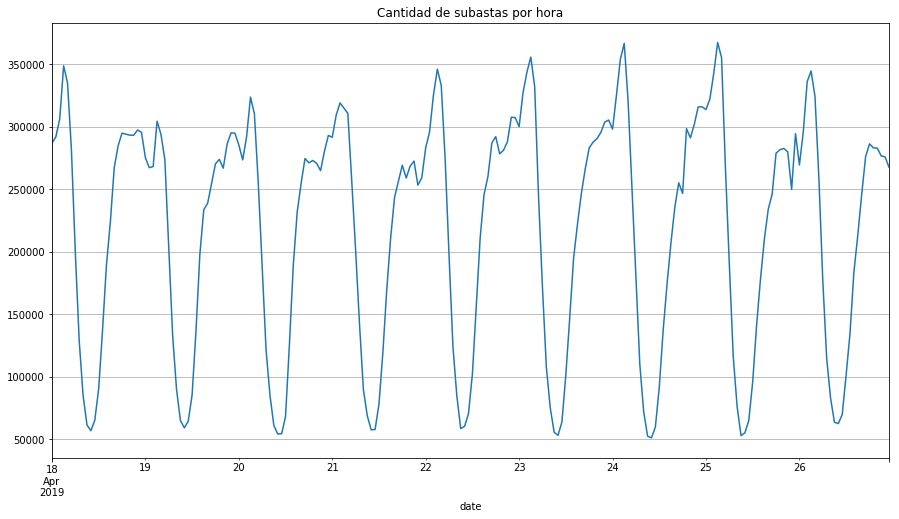

In [7]:
hourly_auctions = auctions.resample('H').size()
hourly_auctions.plot(kind='line', figsize=(15, 8), title='Cantidad de subastas por hora', grid=True)

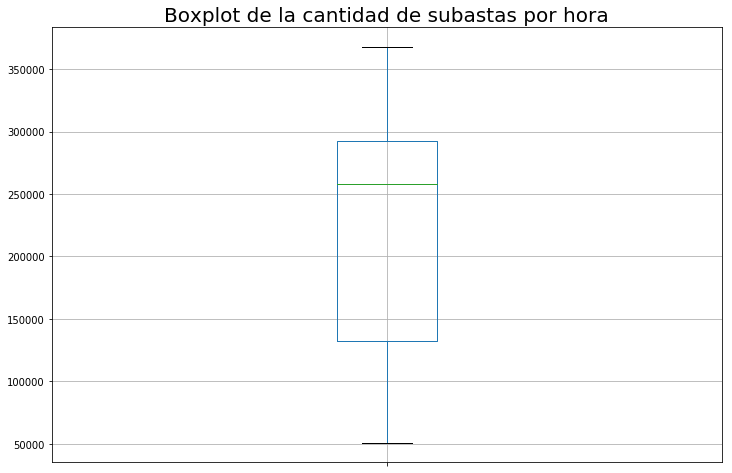

In [8]:
ax = hourly_auctions.plot(kind='box', figsize=(12, 8), title='Boxplot de la cantidad de subastas por hora', grid=True)
ax.set_xlabel('')
ax.set_xticklabels('')
ax.title.set_size(20)

In [9]:
def hourly_auctions_per_day(date, ax=None):
    auctions[date].resample('H').size()\
                  .plot(kind='line', figsize=(20, 8), title=date, ax=ax)

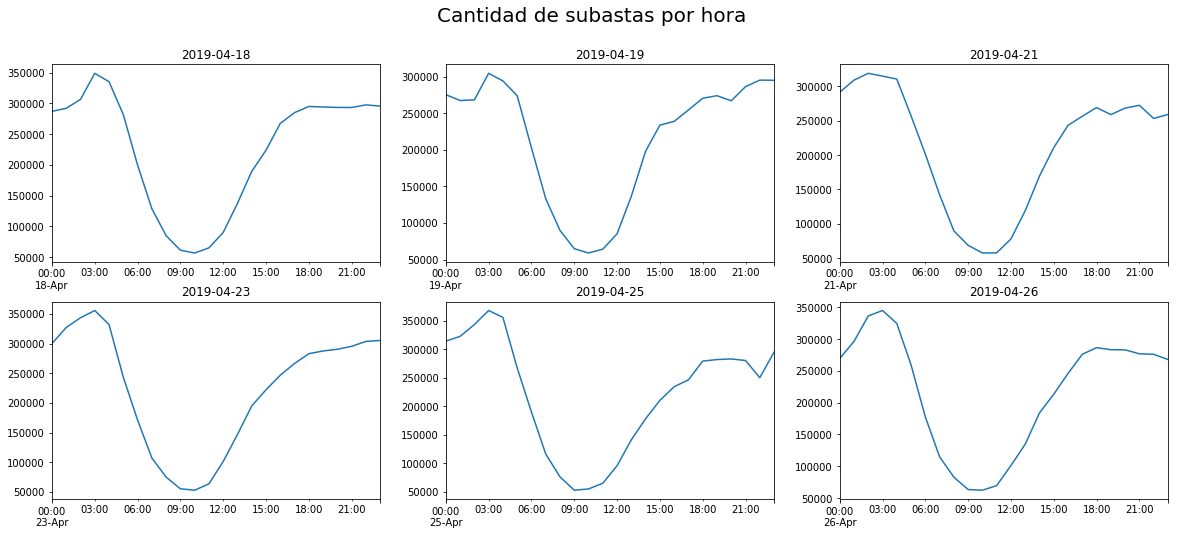

In [11]:
fig, ax_array = plt.subplots(2, 3, figsize=(20,8))
fig.suptitle('Cantidad de subastas por hora', size=20)

dates = ['2019-04-18', '2019-04-19', '2019-04-21', '2019-04-23', '2019-04-25', '2019-04-26']
for day, ax in zip(dates, ax_array.flatten()):
    hourly_auctions_per_day(day, ax)
    ax.set_xlabel('')

[Text(0, 0, '2019-04-18'),
 Text(0, 0, '2019-04-19'),
 Text(0, 0, '2019-04-20'),
 Text(0, 0, '2019-04-21'),
 Text(0, 0, '2019-04-22'),
 Text(0, 0, '2019-04-23'),
 Text(0, 0, '2019-04-24'),
 Text(0, 0, '2019-04-25'),
 Text(0, 0, '2019-04-26')]

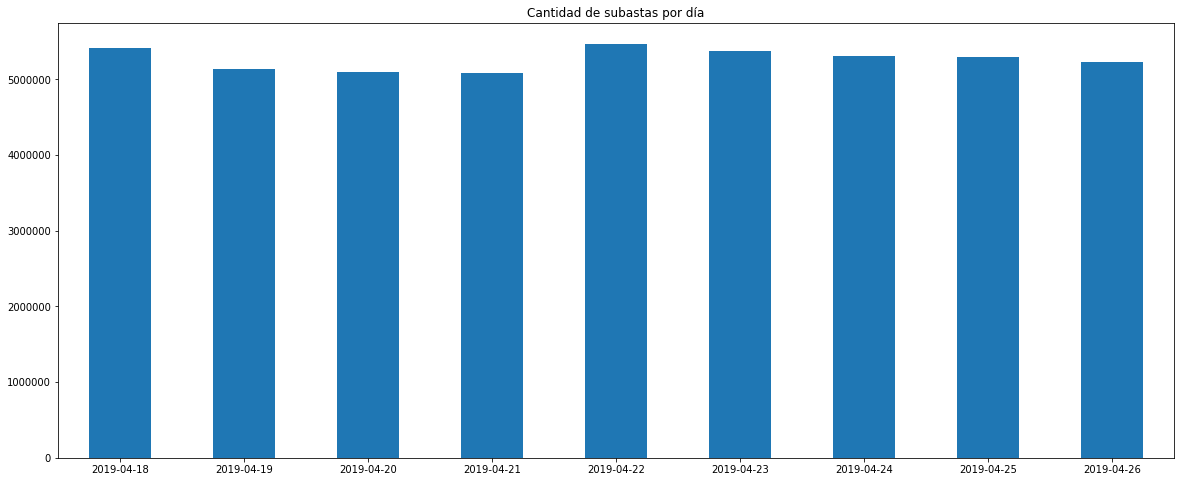

In [12]:
daily_auctions = auctions.resample('D').size()
ax = daily_auctions.plot(kind='bar', figsize=(20, 8), title='Cantidad de subastas por día', rot=0)
ax.set_xlabel('')
ax.set_xticklabels(list(map(str, daily_auctions.index.date)))

In [13]:
# Veamos cuántos device_id diferentes hay
auctions['device_id'].nunique()

475338

In [14]:
# Veamos cuántos dispositivos aparecen menos de 5 veces
(auctions.groupby('device_id').size() <= 5).sum()

138347

In [16]:
# Veamos cuántos dispositivos aparecen más de 5000 veces
(auctions.groupby('device_id').size() >= 5000).sum()

334

Text(0.5, 1.0, 'Histograma de apariciones de dispositivos')

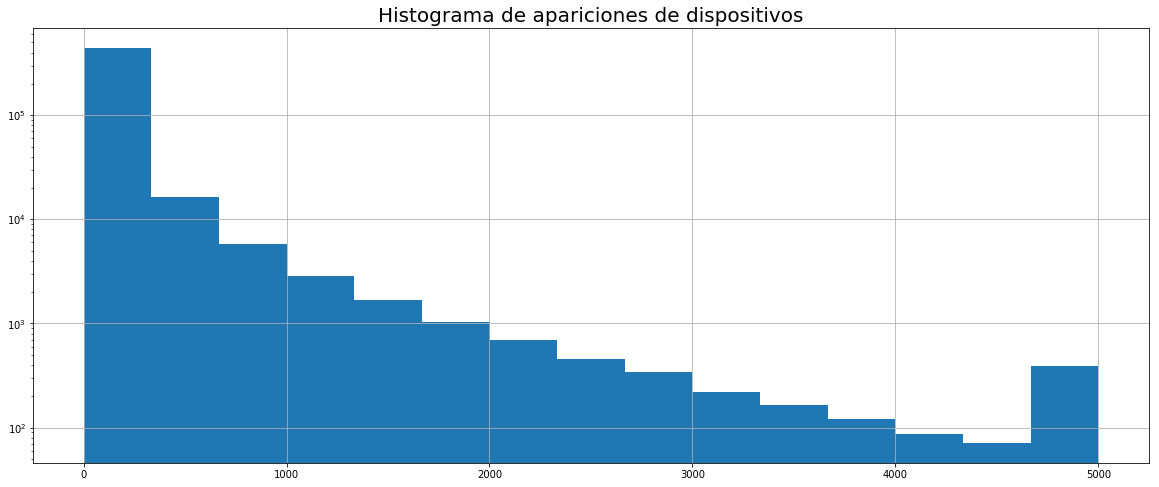

In [17]:
devices_count = auctions.groupby('device_id').size()
devices_count_clipped = devices_count.clip(lower=0, upper=5000)
ax = devices_count_clipped.hist(bins=15, log=True, figsize=(20,8))
ax.set_title('Histograma de apariciones de dispositivos', size=20)